In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data_train = pd.read_csv('train.csv')

columns_train = data_train.columns
for column in columns_train:
    """ Si el valor de la columna es '?' o menor a 0, se reemplaza por None. """
    data_train[column] = data_train[column].replace('?', None)
    data_train[column] = data_train[column].astype(float)
    data_train[column] = data_train[column].apply(lambda x: None if x < 0 else x)

data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63.0,1.0,4.0,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52.0,0.0,2.0,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


#### 00. Detectar correlaciones entre variables

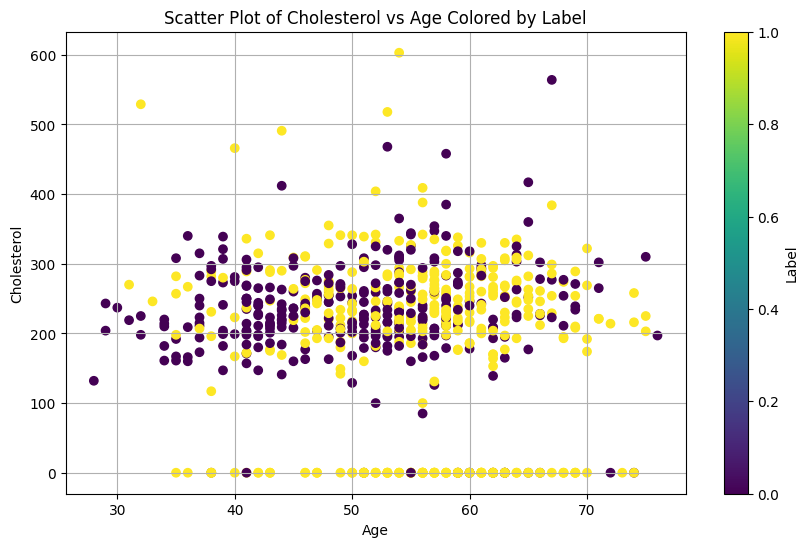

In [3]:
data_train_corr = data_train.copy()
data_train_corr['label_v2'] = data_train_corr['label'].apply(lambda x: 'sick' if x > 0 else 'not sick')
data_train_corr['label_v2'] = data_train_corr['label_v2'].astype('category')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_train_corr['age'], data_train_corr['chol'], c=data_train_corr['label_v2'].cat.codes, cmap='viridis')  # Usar cat.codes para convertir categorías en colores
plt.title('Scatter Plot of Cholesterol vs Age Colored by Label')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.colorbar(scatter, label='Label')
plt.grid(True)
plt.show()

In [4]:
data_train['age*chol'] = data_train['age'] * data_train['chol']
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,age*chol
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0,10863.0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0,12798.0
2,63.0,1.0,4.0,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0,0.0
3,52.0,0.0,2.0,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0,11935.0


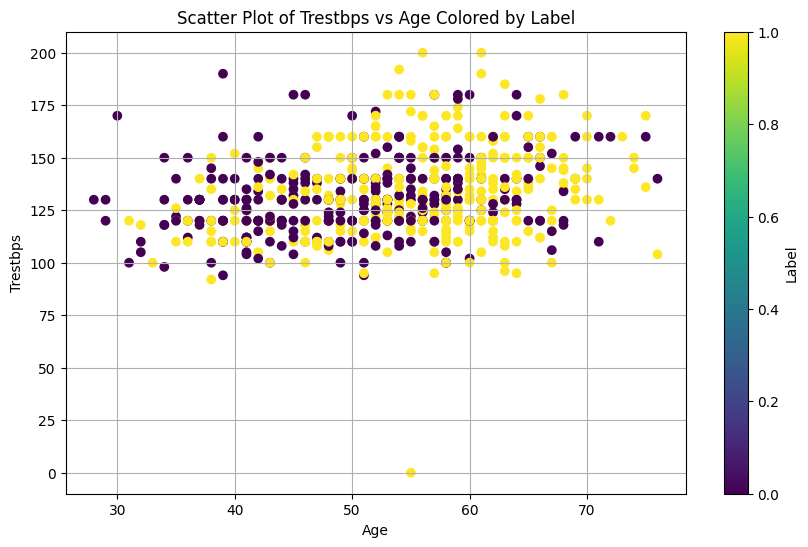

In [5]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_train_corr['age'], data_train_corr['trestbps'], c=data_train_corr['label_v2'].cat.codes, cmap='viridis')  # Usar cat.codes para convertir categorías en colores
plt.title('Scatter Plot of Trestbps vs Age Colored by Label')
plt.xlabel('Age')
plt.ylabel('Trestbps')
plt.colorbar(scatter, label='Label')
plt.grid(True)
plt.show()

In [6]:
data_train['age*trestbps'] = data_train['age'] * data_train['trestbps']

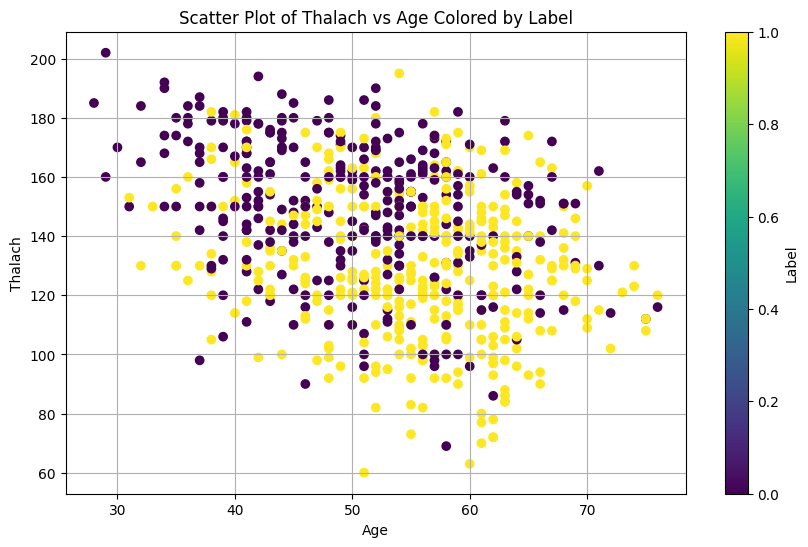

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_train_corr['age'], data_train_corr['thalach'], c=data_train_corr['label_v2'].cat.codes, cmap='viridis')  # Usar cat.codes para convertir categorías en colores
plt.title('Scatter Plot of Thalach vs Age Colored by Label')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.colorbar(scatter, label='Label')
plt.grid(True)
plt.show()

In [10]:
data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,age*chol,age*trestbps
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0,10863.0,6375.0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0,12798.0,6480.0
2,63.0,1.0,4.0,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0,0.0,8820.0
3,52.0,0.0,2.0,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,7280.0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0,11935.0,7700.0


In [11]:
data_train.drop(columns=['chol', 'trestbps'], inplace=True)
data_train.head()

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,age*chol,age*trestbps
0,51.0,1.0,1.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0,10863.0,6375.0
1,54.0,1.0,3.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0,12798.0,6480.0
2,63.0,1.0,4.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0,0.0,8820.0
3,52.0,0.0,2.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,7280.0
4,55.0,1.0,4.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0,11935.0,7700.0
